In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [11]:
aerial=pd.read_csv('operations.csv')
weather_station_location=pd.read_csv('datasets_3759_5944_Weather Station Locations.csv')
weather=pd.read_csv('Summary of Weather.csv')

In [12]:
aerial.shape,weather_station_location.shape,weather.shape

((178281, 46), (161, 8), (119040, 31))

In [19]:
aerial.head()

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0


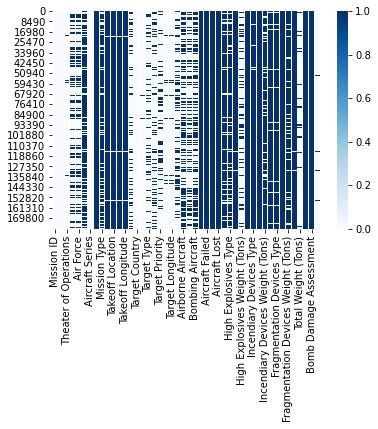

In [20]:
sns.heatmap(aerial.isnull(),cmap='Blues')

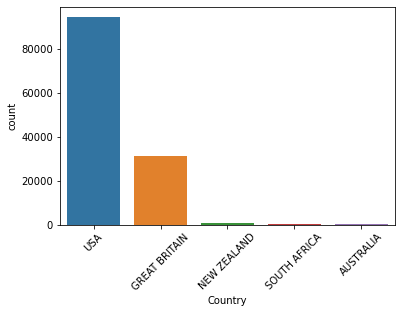

In [18]:
sns.countplot(aerial['Country'])
pl.xticks(rotation=45)
pl.show()

In [21]:
aerial=aerial[pd.isna(aerial.Country)==False]

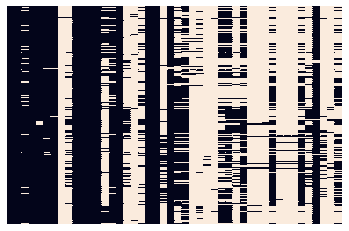

In [35]:
sns.heatmap(aerial.isnull(),xticklabels=0,yticklabels=0,cbar=False)

In [34]:
aerial=aerial[pd.isna(aerial['Target Longitude'])==False]
aerial=aerial[pd.isna(aerial['Takeoff Longitude'])==False]

In [36]:
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']

In [37]:
aerial[drop_list]

,Mission ID,Unit ID,Target ID,Altitude (Hundreds of Feet),Airborne Aircraft,Attacking Aircraft,Bombing Aircraft,Aircraft Returned,Aircraft Failed,Aircraft Damaged,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,27 FBG/86 FBG,40675,NaN,20.0,NaN,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.00,NaN,NaN,NaN
2,3,27 FBG/86 FBG,9630,NaN,18.0,NaN,36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.00,NaN,NaN,NaN
3,4,27 FBG/86 FBG,16140,NaN,15.0,NaN,15.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.50,NaN,NaN,NaN
8,9,27 FBG/86 FBG,39469,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
9,10,27 FBG/86 FBG,16140,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178034,178496,27 FBG/86 FBG,32283,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
178035,178497,240 WG,NaN,NaN,16.0,14.0,14.0,NaN,NaN,NaN,...,17.01,NaN,NaN,NaN,0.0,NaN,50.76,NaN,NaN,699212.0
178080,178542,27 FBG/86 FBG,39469,NaN,85.0,NaN,85.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42.50,NaN,NaN,NaN
178201,178663,205 GP,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,0.0,NaN,3.00,NaN,NaN,697989.0


In [40]:
aerial.drop(drop_list,axis=1,inplace=True)

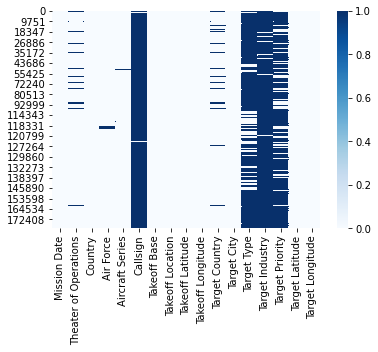

In [42]:
sns.heatmap(aerial.isnull(),cmap='Blues')

In [43]:
aerial.head()

,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Callsign,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude
0,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SPADAFORA,NaN,NaN,NaN,38.22,15.37
2,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,COSENZA,NaN,NaN,NaN,39.27,16.25
3,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.43,15.90
8,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SCILLA,NaN,NaN,NaN,38.23,15.72
9,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,ARMAMENT AND ORDNANCE PLANTS,NaN,38.43,15.90


In [56]:
aerial=aerial[aerial.iloc[:,8]!='4248']
aerial=aerial[aerial.iloc[:,9]!=1355]

In [57]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 0 to 178080
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mission Date           2555 non-null   object 
 1   Theater of Operations  2555 non-null   object 
 2   Country                2555 non-null   object 
 3   Air Force              2505 non-null   object 
 4   Aircraft Series        2528 non-null   object 
 5   Callsign               10 non-null     object 
 6   Takeoff Base           2555 non-null   object 
 7   Takeoff Location       2555 non-null   object 
 8   Takeoff Latitude       2555 non-null   object 
 9   Takeoff Longitude      2555 non-null   float64
 10  Target Country         2499 non-null   object 
 11  Target City            2552 non-null   object 
 12  Target Type            602 non-null    object 
 13  Target Industry        81 non-null     object 
 14  Target Priority        230 non-null    object 
 15  Ta